In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPool1D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import os

In [2]:
mit_train = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',
                          header=None)

print('The shape of train dataset :', mit_train.shape)
mit_train.head()

The shape of train dataset : (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
mit_test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',
                          header=None)

print('The shape of test dataset :', mit_test.shape)
mit_test.head()

The shape of test dataset : (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print('train set classes: ', mit_train.iloc[:, -1].unique())
print('train set classes: ', mit_test.iloc[:, -1].unique())

train set classes:  [0. 1. 2. 3. 4.]
train set classes:  [0. 1. 2. 3. 4.]


In [5]:
mit_train[187] = mit_train[187].astype('int64')

mit_test[187] = mit_test[187].astype('int64')

In [6]:
mit_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(187), int64(1)
memory usage: 125.6 MB


In [7]:
mit_train.describe()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [8]:
pd.set_option('display.max_rows', None)
mit_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

The meaning related to each class:* 
1. 0: "Normal",
2. 1: "Artial Premature",
3. 2: "Premature ventricular contraction",
4. 3: "Fusion of ventricular and normal",
5. 4: "Fusion of paced and normal"

In [9]:
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = mit_train.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label in The Train Dataset"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Train Dataset")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

In [10]:
value_counts = mit_test.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label in The Test Dataset"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Test Dataset")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

<Axes: title={'center': 'ECG of First Person'}>

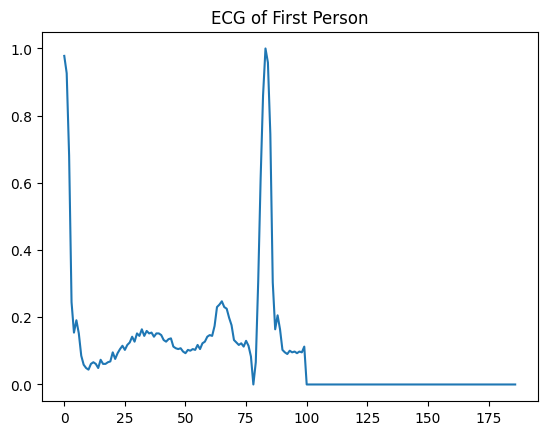

In [11]:
mit_train.iloc[0, :187].plot(title='ECG of First Person')

In [12]:
n = random_index = np.random.randint(100)

ecg_0 = mit_train.loc[mit_train[187]==0, :].iloc[n,:187]
ecg_1 = mit_train.loc[mit_train[187]==1, :].iloc[n,:187]
ecg_2 = mit_train.loc[mit_train[187]==2, :].iloc[n,:187]
ecg_3 = mit_train.loc[mit_train[187]==3, :].iloc[n,:187]
ecg_4 = mit_train.loc[mit_train[187]==4, :].iloc[n,:187]

ecg_df = pd.DataFrame({'Normal': ecg_0,
                       'Artial Premature': ecg_1,
                       'Premature ventricular contraction': ecg_2,
                       'Fusion of ventricular and normal': ecg_3,
                       'Fusion of paced and normal': ecg_4})

In [13]:
ecg_plot = px.line(ecg_df,
                  labels={'index':'Time Intervals', 'value':'Amplitude (mV)', 'variable':'Categories'},
                  title="One ECG form Each Category")
ecg_plot.update_layout(title_x=0.25, width=1000, height=500)
ecg_plot.show()

In [14]:
data = mit_train.iloc[:, :187]
labels = mit_train.iloc[:, 187]

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
data_resampled, labels_resampled = ros.fit_resample(data, labels)

train_df = pd.concat([data_resampled, labels_resampled], axis=1)

train_df.shape

(362355, 188)

In [15]:
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = train_df.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label After Balancing"
                )
pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label After Balancing")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

In [16]:
x_train, x_val, y_train, y_val = train_test_split(train_df.iloc[:, :187],
                                                train_df.iloc[:, 187],
                                                test_size= 0.2,
                                                stratify=train_df.iloc[:, 187],
                                                random_state=42)

x_test = mit_test.iloc[:, :187]
y_test = mit_test.iloc[:, 187]

In [17]:
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values

In [18]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187)
y_train shape:  (289884,)
x_val shape:  (72471, 187)
y_val shape:  (72471,)
x_test shape:  (21892, 187)
y_test shape:  (21892,)


In [19]:
x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_val = x_val.reshape(x_val.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)

In [20]:
y_train = tf.keras.utils.to_categorical(y_train)

y_val = tf.keras.utils.to_categorical(y_val)

y_test = tf.keras.utils.to_categorical(y_test)

In [21]:
print(y_train[-1])
print(y_val[-1])
print(y_test[-1])

[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]


In [22]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187, 1)
y_train shape:  (289884, 5)
x_val shape:  (72471, 187, 1)
y_val shape:  (72471, 5)
x_test shape:  (21892, 187, 1)
y_test shape:  (21892, 5)


In [23]:
model_cnn_lstm = Sequential([
    Input(shape=(x_train.shape[1:])),
    
    Conv1D(64, kernel_size=6, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=3, strides=2, padding="same"),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2, strides=2, padding="same"),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2, strides=2, padding="same"),

    LSTM(64, return_sequences=True, activation="tanh"),
    
    LSTM(32, activation="tanh"),
    
    Flatten(),    
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
    ])

model_cnn_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 182, 64)             │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 182, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 91, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 89, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 89, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 45, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 43, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 43, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 22, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,717 (295.77 KB)

 Trainable params: 75,333 (294.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [24]:
model_cnn_lstm.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [25]:
callbacks = [EarlyStopping(monitor='val_loss', 
                           patience=8),
             ReduceLROnPlateau(patience=20,
                               monitor='val_loss',
                               min_lr=1e-6,
                               cool_down=20),
             ModelCheckpoint(filepath=r'C:\Users\newsh\Downloads\Behrouz\Data Science Bootcamp\Deep Learning\Project\best_model_cnn_lstm.keras', 
                             monitor='val_loss',
                             save_best_only=True)]

In [26]:
history = model_cnn_lstm.fit(x_train, y_train, 
                        epochs=10, 
                        callbacks=callbacks, 
                        batch_size=32, 
                        validation_data=(x_val, y_val),
                       verbose=1)

Epoch 1/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 111s 11ms/step - accuracy: 0.8762 - loss: 0.3420 - val_accuracy: 0.9755 - val_loss: 0.0732 - learning_rate: 0.0010
Epoch 2/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 102s 11ms/step - accuracy: 0.9739 - loss: 0.0764 - val_accuracy: 0.9633 - val_loss: 0.1164 - learning_rate: 0.0010
Epoch 3/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 100s 11ms/step - accuracy: 0.9844 - loss: 0.0476 - val_accuracy: 0.9742 - val_loss: 0.0863 - learning_rate: 0.0010
Epoch 4/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 101s 11ms/step - accuracy: 0.9890 - loss: 0.0336 - val_accuracy: 0.9848 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 5/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 101s 11ms/step - accuracy: 0.9910 - loss: 0.0284 - val_accuracy: 0.9851 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 6/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 100s 11ms/step - accuracy: 0.9930 - loss: 0.0222 - val_accuracy: 0.9927 - val_loss: 0.0231 - learning_rate: 0.0010
Epoch 7/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 101s 11ms/step -

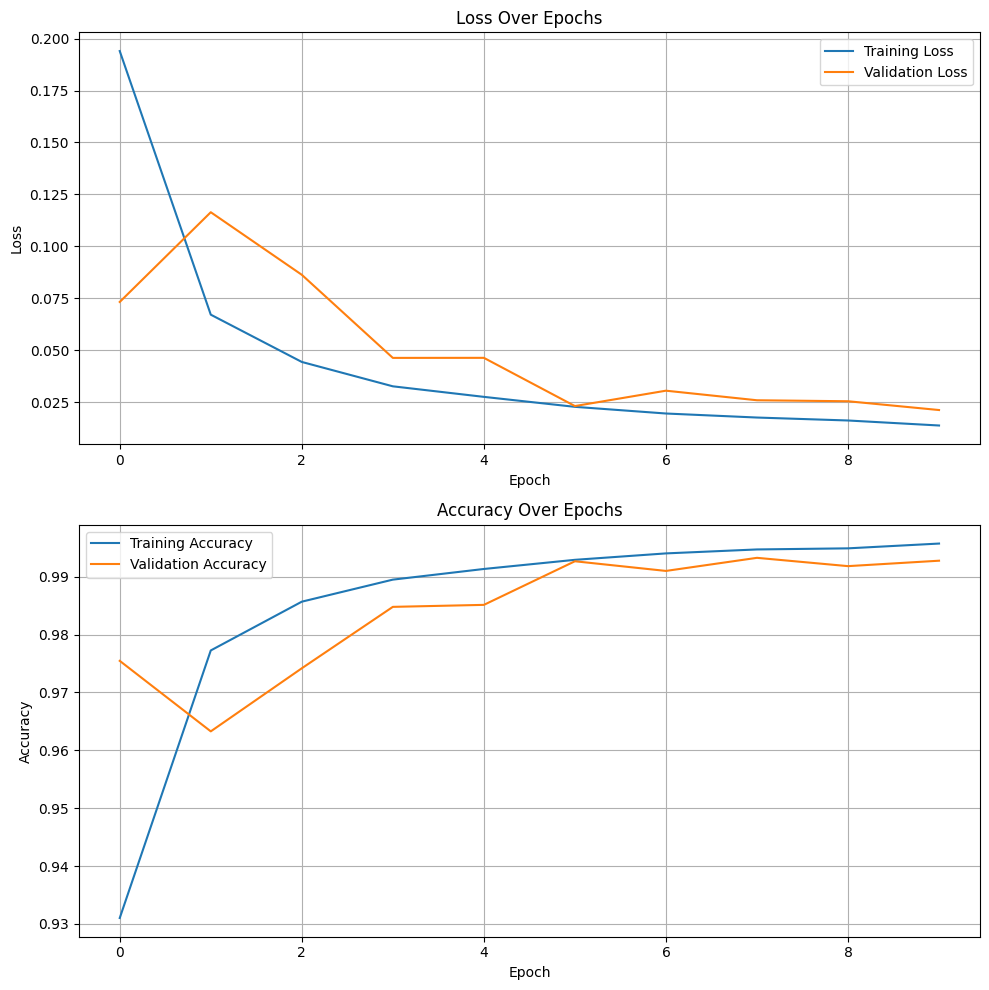

In [27]:
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [28]:
train_score = model_cnn_lstm.evaluate(x_train, y_train)
validation_score = model_cnn_lstm.evaluate(x_val, y_val)

print('Accuracy Train data: ', train_score[1])
print('Accuracy Validation data: ', validation_score[1])

9059/9059 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9943 - loss: 0.0153
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9926 - loss: 0.0228
Accuracy Train data:  0.994232177734375
Accuracy Validation data:  0.9927695393562317


In [29]:
y_pred = model_cnn_lstm.predict(x_test)


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [30]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.70      0.85      0.77       556
           2       0.96      0.95      0.96      1448
           3       0.68      0.85      0.76       162
           4       0.98      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.86      0.93      0.89     21892
weighted avg       0.98      0.98      0.98     21892



In [31]:
cm = confusion_matrix(y_test_labels, y_pred_labels, 
                      normalize='true'
                     )

labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal']

cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix
cm_fig = px.imshow(cm_df, 
                labels=dict(x="Predicted", y="True", color="Count"), 
                x=labels, 
                y=labels,
                text_auto=True,
                title='Confusion Matrix', 
                color_continuous_scale='Blues'
               )
cm_fig.update_layout(title_x=0.5, width=800, height=600)
cm_fig.show()

In [32]:
from tensorflow.keras.models import load_model

# تحميل النموذج الأصلي بصيغة .keras
model = load_model(r"C:\Users\newsh\Downloads\Behrouz\Data Science Bootcamp\Deep Learning\Project\best_model_cnn_lstm.keras")

# حفظه بصيغة .h5
model.save("best_model.h5")


In [35]:
model_path = r"/kaggle/working/C:\Users\newsh\Downloads\Behrouz\Data Science Bootcamp\Deep Learning\Project\best_model_cnn_lstm.keras"

if os.path.exists(model_path):
    model = load_model(model_path)
    print("✅ النموذج تم تحميله بنجاح!")
else:
    print("❌ ملف النموذج غير موجود، تأكد من المسار.")

✅ النموذج تم تحميله بنجاح!


In [36]:
# تحميل البيانات
real_data = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

# التأكد من شكل البيانات
print("Original data shape:", real_data.shape)  # يجب أن يكون عدد الأعمدة = 188

# التحقق مما إذا كان العمود الأخير يمثل التصنيفات، ثم إزالته
if real_data.shape[1] == 188:
    real_data = real_data.iloc[:, :-1]  # حذف العمود الأخير

print("Updated data shape:", real_data.shape)  # الآن يجب أن يكون (21892, 187)

# تحويل البيانات إلى NumPy Array
real_data = real_data.values  

# إعادة تشكيل البيانات لتناسب النموذج (العينات, 187, 1)
real_data = real_data.reshape(real_data.shape[0], 187, 1)

print("✅ Data is ready for prediction!")

# اختيار عينة واحدة فقط للاختبار
test_data = real_data[20000].reshape(1, 187, 1)  # عينة واحدة فقط من البيانات

# تمرير البيانات إلى النموذج للتنبؤ
prediction = model.predict(test_data)
print("🔮 توقع النموذج:", prediction)


Original data shape: (21892, 188)
Updated data shape: (21892, 187)
✅ Data is ready for prediction!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
🔮 توقع النموذج: [[2.1788769e-06 4.4276552e-10 9.9999452e-01 3.3192648e-06 2.7106697e-09]]


In [37]:
predicted_class = np.argmax(prediction)  # إرجاع الفئة ذات الاحتمالية الأعلى
print("🚀 الفئة المتوقعة:", predicted_class)


🚀 الفئة المتوقعة: 2


In [38]:
# تحميل البيانات الأصلية مرة أخرى
df = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

# استخراج الفئة الحقيقية (آخر عمود)
actual_class = df.iloc[20000, 187]  # يفترض أن العينة المختبرة هي العينة رقم 0

print("✅ الفئة الحقيقية:", actual_class)


✅ الفئة الحقيقية: 2.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.



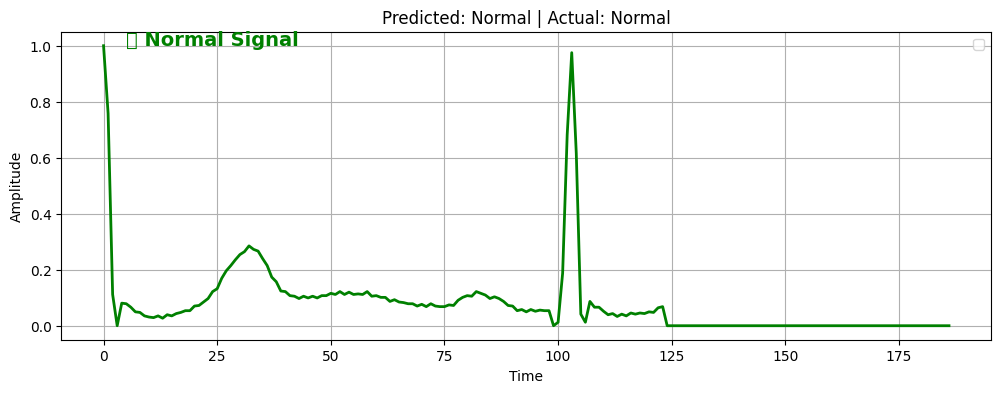

In [43]:
class_names = {
    0: "Normal",
    1: "Atrial Premature",
    2: "Premature Ventricular Contraction",
    3: "Fusion of Ventricular and Normal",
    4: "Fusion of Paced and Normal"
}

# --------- تحميل البيانات ---------
df = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)
x_data = df.iloc[:, :-1].values
y_data = df.iloc[:, -1].values
x_data = x_data.reshape(x_data.shape[0], x_data.shape[1], 1)

# --------- تحميل النموذج ---------
# model = load_model("path_to_model.keras")  ← فعّل دي لو بتستخدم model محفوظ

# --------- تحديد رقم الإشارة ---------
index = 0  # ← غير الرقم ده لأي عينة عايز تعرضها

# --------- تجهيز البيانات ---------
test_signal = x_data[index].reshape(1, 187, 1)
true_label = int(y_data[index])

# --------- التنبؤ ---------
prediction = model.predict(test_signal)
predicted_class = np.argmax(prediction)
predicted_name = class_names[predicted_class]
actual_name = class_names[true_label]

# --------- رسم الإشارة ---------
signal = x_data[index].squeeze()
peak_index = np.argmax(np.abs(signal))
start = max(0, peak_index - 10)
end = min(len(signal), peak_index + 10)

plt.figure(figsize=(12, 4))
plt.plot(signal, color="green" if predicted_class == 0 else "red", linewidth=2)

if predicted_class != 0:
    plt.axvspan(start, end, color='yellow', alpha=0.3, label="⚠️ Suspected anomaly")
    plt.text(5, max(signal), f"⚠️ Abnormal: {predicted_name}", fontsize=14, color='red', weight='bold')
else:
    plt.text(5, max(signal), f"✅ Normal Signal", fontsize=14, color='green', weight='bold')

plt.title(f"Predicted: {predicted_name} | Actual: {actual_name}", fontsize=12)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


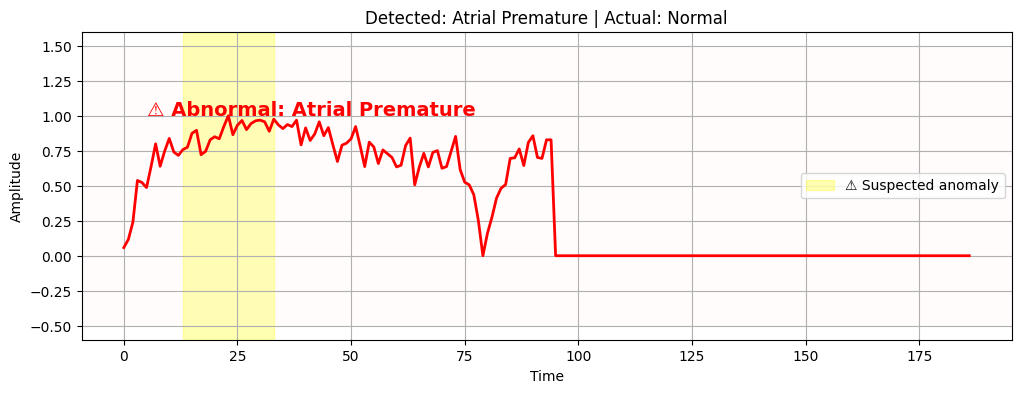

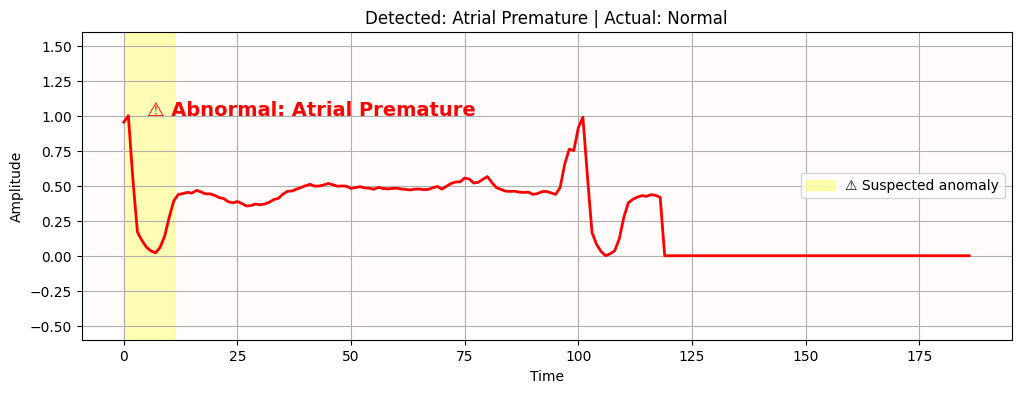

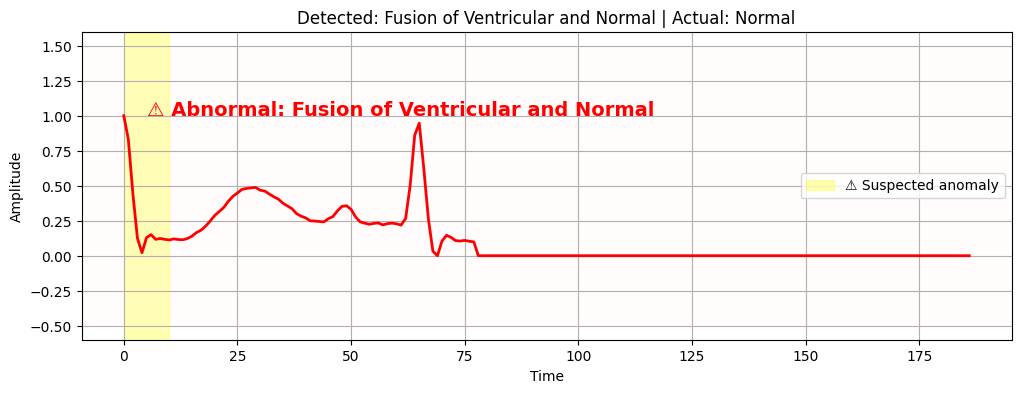

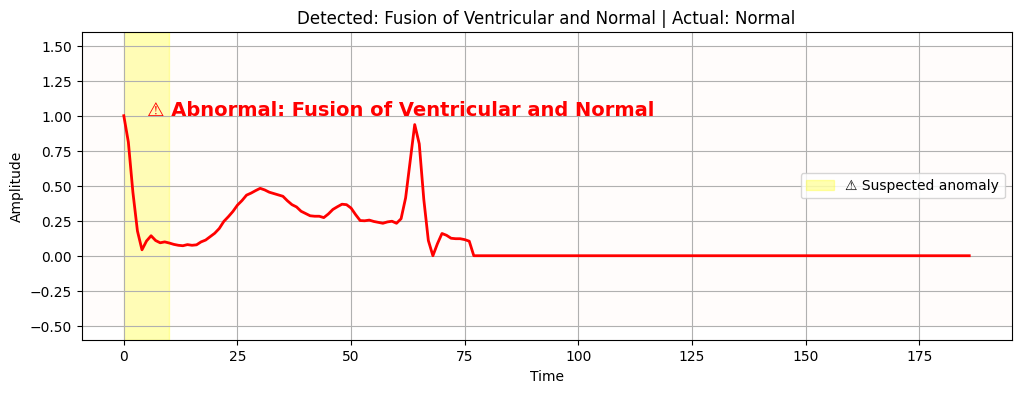

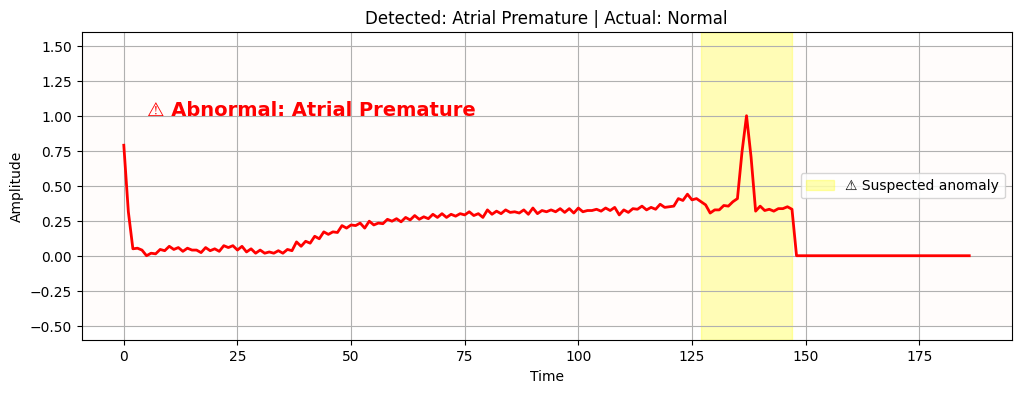

In [39]:
class_names = {
    0: "Normal",
    1: "Atrial Premature",
    2: "Premature Ventricular Contraction",
    3: "Fusion of Ventricular and Normal",
    4: "Fusion of Paced and Normal"
}

# --------- تحميل البيانات ---------
df = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)
x_data = df.iloc[:, :-1].values
y_data = df.iloc[:, -1].values
x_data = x_data.reshape(x_data.shape[0], x_data.shape[1], 1)

# --------- تحميل النموذج ---------
# model = load_model("path_to_model.keras")
predictions = model.predict(x_data, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# --------- عرض فقط أول 5 إشارات غير طبيعية مثلاً ---------
abnormal_count = 0
max_abnormal_to_show = 5

for i in range(len(x_data)):
    predicted_class = predicted_classes[i]

    if predicted_class != 0:  # فقط Abnormal
        signal = x_data[i].squeeze()
        predicted_name = class_names[predicted_class]
        actual_class = int(y_data[i])
        actual_name = class_names[actual_class]

        peak_index = np.argmax(np.abs(signal))
        start = max(0, peak_index - 10)
        end = min(len(signal), peak_index + 10)

        plt.figure(figsize=(12, 4))
        plt.plot(signal, color="red", linewidth=2)
        plt.axvspan(start, end, color='yellow', alpha=0.3, label="⚠️ Suspected anomaly")
        plt.axhspan(min(signal)-0.5, max(signal)+0.5, facecolor='mistyrose', alpha=0.1)
        plt.text(5, max(signal), f"⚠️ Abnormal: {predicted_name}", fontsize=14, color='red', weight='bold')
        plt.title(f"Detected: {predicted_name} | Actual: {actual_name}", fontsize=12)
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.legend()
        plt.show()  # ← هنا بنعرضها بدل ما نحفظها

        abnormal_count += 1
        if abnormal_count >= max_abnormal_to_show:
            break
